In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json

In [2]:
def boxCount(im, eps):
    n = len(im);
    q = int(n/eps)
    r = n-q*eps

    N = 0;
    
    for br in range(q):
        for bc in range(q):

            c = im[br*eps][bc*eps]
            flag = True;
            for i in range(eps):
                if(not flag):
                    break;
                for j in range(eps):
                    if im[br*eps+i][bc*eps+j] != c:
                        N+=1;
                        flag = False;
                        break;
    return N


def factors(n):
    a = [];
    for i in range(2, int(n**0.5)+1):
        if(n%i==0):
            a.append(i)
            if(i!=n/i):
                a.append(int(n/i))
    a.sort()
    return np.array(a)
        

## New Json

In [3]:
from scipy.optimize import curve_fit

In [4]:
def linear(x, a, b):
    return a*x+b

x = [1.1,2.2,2.9,4.1,4.9]
y= [2,3,4,5,6]

curve_fit(linear,x,y)[0][0]

1.0471781303102434

In [5]:
dimList = [];
x0 = factors(800);
x = np.log(x0);

for c in range(690):
    im = open('../Picture Data/data4/' + str (c) + '.json')
    data = json.load(im)

    y = [];
    for i in x0:
        y.append(boxCount(data,i))
    
    dimList.append(-curve_fit(linear,x, np.log(y))[0][0])


In [ ]:
for c in range(660):
    im = open('./Data and Picture Drawing/Total Data/data6/' + str (c) + '.json')
    data = json.load(im)

    y = [];
    for i in x0:
        y.append(boxCount(data,i))
    
    dimList.append(-curve_fit(linear,x, np.log(y))[0][0])


FileNotFoundError: [Errno 2] No such file or directory: './Data and Picture Drawing/Total Data/data6/660.json'

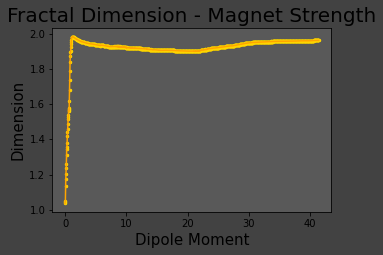

In [14]:
fig, ax = plt.subplots(figsize = (5,2))

plt.subplots_adjust(top = 1.4);

#fig.set_facecolor('blue') ##Set patch color of entire figure
fig.set_facecolor('#424242')
ax.set_title('Fractal Dimension - Magnet Strength', fontsize = 20);
ax.set_xlabel('Dipole Moment', fontsize = 15);
ax.set_ylabel('Dimension', fontsize = 15);
ax.set_facecolor('#595959')

ax.scatter(np.linspace(0,41.4, 690+660), dimList, s=6, color = "gold")
ax.plot(np.linspace(0,41.4, 690+660), dimList, color="orange")

In [11]:
dimList = [];
x0 = factors(800);
x = np.log(x0);

for c in range(1,22):
    im = open('../Picture Data/data5/' + str (c) + '.json')
    data = json.load(im)

    y = [];
    for i in x0:
        y.append(boxCount(data,i))
    
    dimList.append(-curve_fit(linear,x, np.log(y))[0][0])

In [25]:
for c in range(0,22):
    im = open('../Picture Data/data7/' + str (c) + '.json')
    data = json.load(im)

    y = [];
    for i in x0:
        y.append(boxCount(data,i))
    
    dimList.append(-curve_fit(linear,x, np.log(y))[0][0])

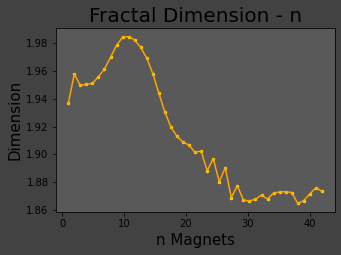

In [29]:
fig, ax = plt.subplots(figsize = (5,2))

plt.subplots_adjust(top = 1.4);

#fig.set_facecolor('blue') ##Set patch color of entire figure
fig.set_facecolor('#424242')
ax.set_title('Fractal Dimension - n', fontsize = 20);
ax.set_xlabel('n Magnets', fontsize = 15);
ax.set_ylabel('Dimension', fontsize = 15);
ax.set_facecolor('#595959')

ax.scatter(np.linspace(1,42, 43), dimList, s=6, color = "gold")
ax.plot(np.linspace(1,42, 43), dimList, color="orange")

In [22]:
np.linspace(0,21,22)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

## Standalone Image

In [8]:
image = Image.open('Fractal.png')
im = np.asarray(image)

fractal = []; #when opened like this there are different shades of yellow/red etc, this makes the picture uniform
for i in range(len(im)):
    fractal.append([])
    for j in range(len(im[0])):
        if(max(im[i][j])<100):
            fractal[-1].append(3);
        else:
            fractal[-1].append(np.argmax(im[i][j][:3]))
            
fractal = np.array(fractal)

In [9]:
x = factors(1600);
y = [];
for i in range(len(x)):
    y.append(boxCount(fractal, x[i]))
y = np.array(y)

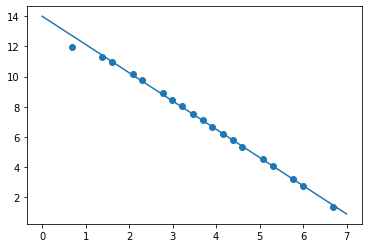

In [10]:
plt.scatter(np.log(x),np.log(y))
plt.plot(np.linspace(0,7, 10), 14-1.871683632896994*np.linspace(0,7,10))

In [88]:
dim = -(np.log(y[1])-np.log(y[-1]))/(np.log(x[1])-np.log(x[-1]))
dim

1.871683632896994

## Old JSON

In [41]:
dimList = [];
for c in range(2000):
    im = open('./beegboi/pp' + str (4000 + c) + '.json')
    data = json.load(im)
    newdata = []
    for i in range(len(data)-1):
        newdata.append([])
        for j in range(len(data[0])):
            a = 0;
            if data[i][j] == "red":
                a = 0;
            elif data[i][j] =="blue":
                a = 1;
            elif data[i][j] == "black":
                a = 2;
            else:
                a = 3
            newdata[-1].append(a)
    newdata = np.array(newdata)
    y0 = boxCount(newdata, 5);
    y1 = boxCount(newdata,25);
    dimList.append(-(np.log(y0)-np.log(y1))/(np.log(5)-np.log(25)))


In [45]:
dimList2 = [];
for c in range(2000):
    im = open('./bigboyg/pp' + str (c) + '.json')
    data = json.load(im)
    newdata = []
    for i in range(len(data)-1):
        newdata.append([])
        for j in range(len(data[0])):
            a = 0;
            if data[i][j] == "red":
                a = 0;
            elif data[i][j] =="blue":
                a = 1;
            elif data[i][j] == "black":
                a = 2;
            else:
                a = 3
            newdata[-1].append(a)
    newdata = np.array(newdata)
    y0 = boxCount(newdata, 5);
    y1 = boxCount(newdata,25);
    dimList2.append(-(np.log(y0)-np.log(y1))/(np.log(5)-np.log(25)))


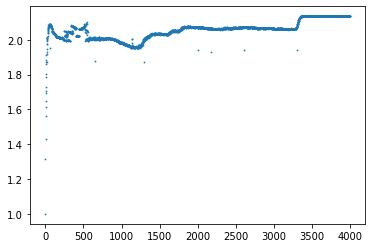

In [51]:
plt.scatter(range(len(dimList)+len(dimList2)), dimList+dimList2, s=0.6)

In [15]:
newdata = []
for i in range(len(data)):
    newdata.append([])
    for j in range(len(data[0])):
        a = 0;
        if data[i][j] == "red":
            a = 0;
        elif data[i][j] =="blue":
            a = 1;
        elif data[i][j] == "black":
            a = 2;
        else:
            a = 3
        newdata[-1].append(a)
newdata = np.array(newdata)

In [16]:
x = factors(200);
y = [];
for i in range(len(x)):
    y.append(boxCount(newdata, x[i]))
y = np.array(y)

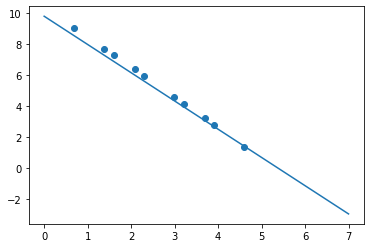

In [17]:
plt.scatter(np.log(x),np.log(y))
plt.plot(np.linspace(0,7, 10), 9.8-1.8206741023950503*np.linspace(0,7,10))

In [13]:
dim = -(np.log(y[-1])-np.log(y[2]))/(np.log(x[-1])-np.log(x[2]))
dim

1.8930070498835898